In [35]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft2, ifft2, fftfreq, fftshift
from scipy.stats import skew, kurtosis
print('Modules loaded :)')

Modules loaded :)


In [75]:
def generate_white_noise_image(size):
    """Generate a white-noise image."""
    return np.random.normal(size=size, scale=(1))

def generate_non_gaussian_image(size):
    # Create an image with non-Gaussian features
    image = np.zeros(size)
    for i in range(0, size[0], 20):
        for j in range(0, size[1], 20):
            image[i:i+10, j:j+10] = np.random.rand()*1
    return image

def generate_noise_with_spectrum(shape, n, strength=1):
    """Generate noise with a power spectrum proportional to k^-n."""
    kx, ky = np.meshgrid(fftfreq(shape[0]), fftfreq(shape[1]), indexing='ij')
    k = np.sqrt(kx**2 + ky**2)
    k[0, 0] = 1  # To avoid division by zero in the next step
    noise = np.fft.fft2(np.random.normal(size=shape))
    noise *= strength * (k**(-n/2.0))
    return noise

def add_noise_to_image(image, noise):
    """Add noise to the image in the frequency domain."""
    fft_image = fft2(image)
    noisy_fft_image = fft_image + noise
    noisy_image = np.real(ifft2(noisy_fft_image))
    return noisy_image


def calculate_skewness(image):
    return skew(image.flatten())

def calculate_kurtosis(image):
    return kurtosis(image.flatten())

def calculate_bispectrum(image):
    fft_image = fft2(image)
    N, M = fft_image.shape
    bispec = np.zeros((N, M), dtype=complex)
    for i in range(N):
        for j in range(M):
            for k in range(M):
                if i + j < N and j + k < M:
                    bispec[i + j, j + k] += fft_image[i, j] * fft_image[j, k] * fft_image[-(i + j), -(j + k)]
    return bispec


Relative difference between the original and noisy image: 62.22%
Skewness of the white-noise image: 1.96; Skewness of the noisy image: 1.61
Kurtosis of the white-noise image: 2.46; Kurtosis of the noisy image: 1.91


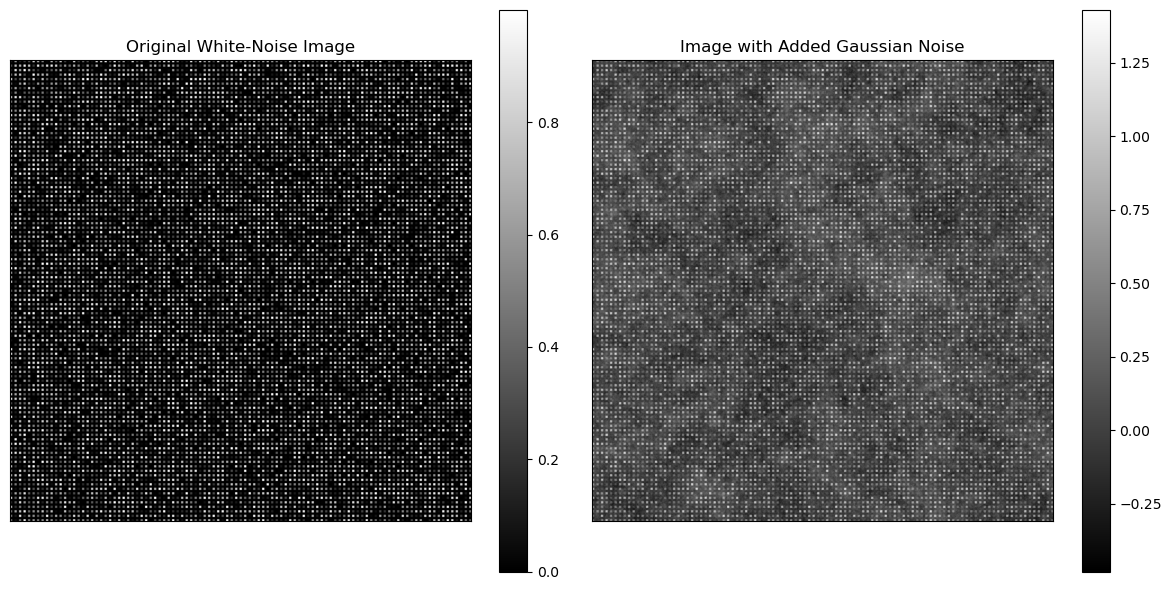

In [89]:
# Parameters
nside = 2048  # Number of pixels on the side of the image
image_size = (nside, nside)  # Image size
n = 2  # Power spectrum exponent
seed = 43  # Seed for the random number generator

# Set the seed for the random number generator
np.random.seed(seed)

# Generate white-noise image
#white_noise_image = generate_white_noise_image(image_size)
white_noise_image = generate_non_gaussian_image(image_size)
skewness_white_noise = calculate_skewness(white_noise_image)
kurtosis_white_noise = calculate_kurtosis(white_noise_image)
#bispectrum_white_noise = calculate_bispectrum(white_noise_image)

# Generate Gaussian noise with the specified power spectrum
gaussian_noise = generate_noise_with_spectrum(image_size, n, strength=.015)

# Add the noise to the white-noise image
noisy_image = add_noise_to_image(white_noise_image, gaussian_noise)
skewness_noisy_image = calculate_skewness(noisy_image)
kurtosis_noisy_image = calculate_kurtosis(noisy_image)

print(f'Relative difference between the original and noisy image: {np.sum(np.abs(white_noise_image - noisy_image)) / np.sum(np.abs(white_noise_image)) * 100:.2f}%')
print(f'Skewness of the white-noise image: {skewness_white_noise:.2f}; Skewness of the noisy image: {skewness_noisy_image:.2f}')
print(f'Kurtosis of the white-noise image: {kurtosis_white_noise:.2f}; Kurtosis of the noisy image: {kurtosis_noisy_image:.2f}')


# Normalize and display the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(white_noise_image, cmap='gray')
plt.title('Original White-Noise Image')
plt.colorbar()
plt.xticks([]); plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Image with Added Gaussian Noise')
plt.colorbar()
plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()